In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [11]:
df = pd.read_csv('data/test.csv')
df.head()

,t,y
0,0.000000,0.970921
1,0.263158,1.686714
2,0.526316,2.199626
3,0.789474,2.516062
4,1.052632,3.067824


In [17]:
def linear(t, m, b):
    return m*t + b

popt, pcov = curve_fit(linear, df['t'], df['y'])
m, b = popt
dm, db = np.sqrt(pcov.diagonal())
mtxt = f"m = {m:0.3f} ± {dm:0.3f}"
btxt = f"b = {b:0.3f} ± {db:0.3f}"
print(f"{mtxt}; {btxt}")

m = 1.984 ± 0.015; b = 1.027 ± 0.043


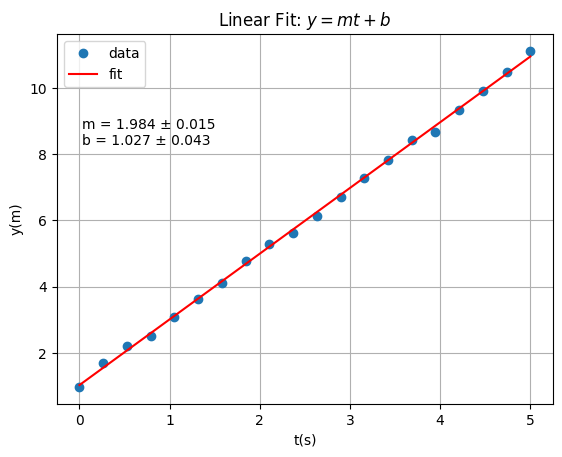

In [26]:
plt.plot(df['t'], df['y'], 'o', label='data')
plt.plot(df['t'], linear(df['t'], *popt),'r-', label='fit')
plt.grid()
plt.xlabel('t(s)')
plt.ylabel('y(m)')
plt.title('Linear Fit: $y = mt + b$')
plt.legend()
plt.text(0.05, 0.7, f"{mtxt}\n{btxt}", transform=plt.gca().transAxes)
plt.show()
